<a href="https://colab.research.google.com/github/Gltknzk/My_Works_DL/blob/master/DL_(Image_Classification_with_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [8]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [10]:
X_train[9].shape

(28, 28)

In [11]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

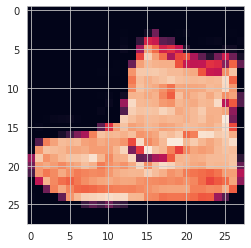

In [13]:
plt.imshow(X_train[0])
# plt.matshow(X_train[9])

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
y_train[9]

5

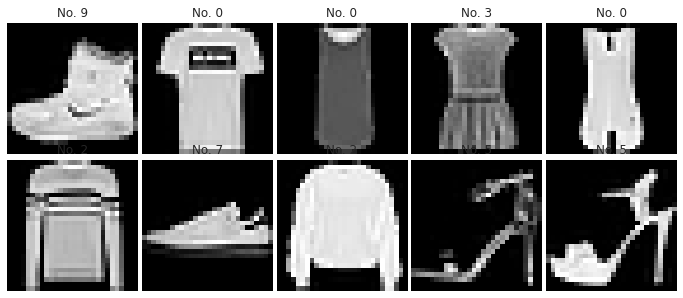

In [16]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
X_train[9].min()

0

In [18]:
X_train[9].max()

255

In [19]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[9].min()

0.0

In [21]:
X_train[9].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

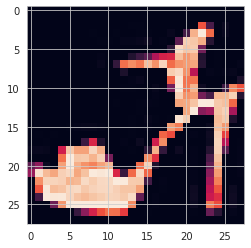

In [22]:
plt.imshow(X_train[9])

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [25]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [27]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [31]:
y_train[9]

5

In [32]:
y_train[9]

5

In [34]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [36]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [40]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4071 - accuracy: 0.8551 - val_loss: 0.3398 - val_accuracy: 0.8744
Epoch 2/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2786 - accuracy: 0.8997 - val_loss: 0.2966 - val_accuracy: 0.8922
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2313 - accuracy: 0.9143 - val_loss: 0.2802 - val_accuracy: 0.8995
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1988 - accuracy: 0.9264 - val_loss: 0.2551 - val_accuracy: 0.9079
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1720 - accuracy: 0.9366 - val_loss: 0.2627 - val_accuracy: 0.9074
Epoch 6/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.1482 - accuracy: 0.9443 - val_loss: 0.2684 - val_accuracy: 0.9124


In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.407,0.855,0.340,0.874
1,0.279,0.900,0.297,0.892
2,0.231,0.914,0.280,0.900
3,0.199,0.926,0.255,0.908
4,0.172,0.937,0.263,0.907


**TASK 7: Plot values of metrics you used in your model.**

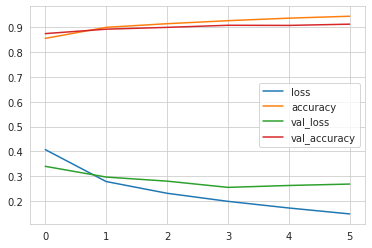

In [43]:
summary.plot();

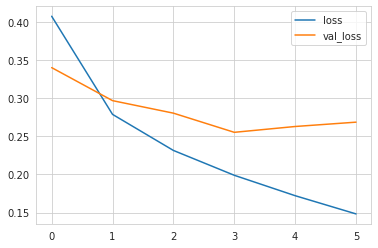

In [44]:
summary[["loss", "val_loss"]].plot();

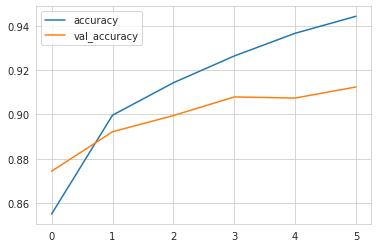

In [45]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [46]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [47]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2551 - accuracy: 0.9079


[0.2550654113292694, 0.9078999757766724]

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2550654113292694
Test accuracy: 0.9078999757766724


In [49]:
pred_prob = model.predict(X_test)
pred_prob

array([[2.6249194e-07, 5.4200928e-08, 1.4016776e-07, ..., 3.7406920e-04,
        1.1138111e-05, 9.9925083e-01],
       [1.8444071e-05, 1.8814950e-11, 9.9995399e-01, ..., 2.1847073e-16,
        3.1706245e-11, 9.9254707e-16],
       [1.4117132e-06, 9.9999845e-01, 1.1510984e-08, ..., 3.8012970e-12,
        1.6024602e-09, 3.8706510e-11],
       ...,
       [1.7092310e-05, 5.0187761e-09, 1.9161316e-06, ..., 3.7268379e-08,
        9.9873906e-01, 8.0548679e-10],
       [6.6034004e-06, 9.9996877e-01, 1.5180667e-06, ..., 4.9632596e-09,
        7.9500360e-08, 6.3800336e-08],
       [2.5040883e-04, 3.3767075e-05, 1.4448916e-02, ..., 5.1697660e-02,
        2.1398688e-02, 2.8222585e-03]], dtype=float32)

## Prediction

In [50]:
pred_prob.shape

(10000, 10)

In [51]:
pred_prob[0]

array([2.6249194e-07, 5.4200928e-08, 1.4016776e-07, 2.1581909e-07,
       2.8670624e-07, 3.6196091e-04, 9.2897244e-07, 3.7406920e-04,
       1.1138111e-05, 9.9925083e-01], dtype=float32)

In [52]:
np.argmax(pred_prob[0])

9

In [53]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [54]:
y_pred.shape

(10000,)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.83      0.85      1000
           3       0.90      0.92      0.91      1000
           4       0.85      0.88      0.86      1000
           5       0.97      0.98      0.98      1000
           6       0.74      0.74      0.74      1000
           7       0.96      0.95      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [56]:
print(confusion_matrix(y_test, y_pred))

[[875   0  10  13   5   3  91   0   3   0]
 [  2 977   0  13   3   0   4   0   1   0]
 [ 19   0 826  12  66   0  76   0   1   0]
 [ 17   4   9 918  23   0  28   0   1   0]
 [  0   0  46  25 875   0  52   0   2   0]
 [  0   0   0   0   0 985   0   9   0   6]
 [119   0  46  32  60   0 738   0   5   0]
 [  0   0   0   0   0  15   0 948   0  37]
 [  2   0   1   7   1   4   6   4 975   0]
 [  0   0   0   0   0   8   1  29   0 962]]


In [57]:
(y_test != y_pred).sum()

921

In [58]:
my_number = X_test[3]

In [59]:
my_number.shape

(28, 28, 1)

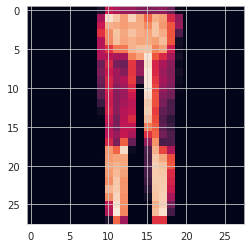

In [60]:
plt.imshow(my_number.reshape(28,28));

In [61]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[1.9456789e-07, 9.9999750e-01, 1.4365696e-08, 2.2575189e-06,
        6.7348513e-09, 4.5918416e-09, 1.4795811e-08, 9.8657735e-11,
        1.4994102e-09, 1.9461706e-09]], dtype=float32)

In [62]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

In [63]:
model.save("cnn-ass.h5")

In [64]:
model=tf.keras.models.load_model('cnn-ass.h5')

In [65]:
pred=model.predict(np.expand_dims(X_test[5],axis=0))

In [66]:
np.argmax(pred)

1

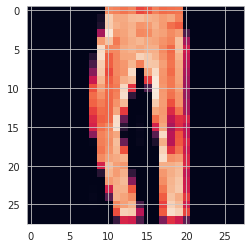

In [67]:
plt.imshow(X_test[5].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___